In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_image = x_train[0]

In [6]:
single_image.shape

(28, 28)

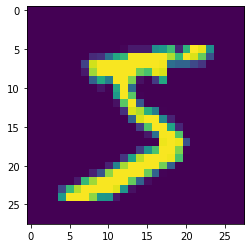

In [7]:
plt.imshow(single_image)

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

One Hot Encoding for categorical values

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train.shape

(60000,)

In [11]:
y_example = to_categorical(y_train)

In [12]:
y_example.shape

(60000, 10)

In [13]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
y_cat_test = to_categorical(y_test, num_classes=10)

In [15]:
y_cat_train = to_categorical(y_train, 10)

In [16]:
single_image.max()

255

In [17]:
single_image.min()

0

In [18]:
x_train = x_train/255

In [19]:
x_test = x_test/255

In [20]:
scaled_image = x_train[0]

In [21]:
scaled_image.max()

1.0

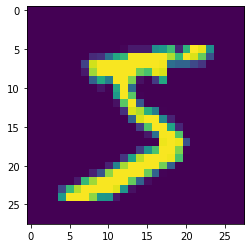

In [22]:
plt.imshow(scaled_image)

In [23]:
x_train.shape

(60000, 28, 28)

In [24]:
#batch_size, with, height, color_channels
x_train = x_train.reshape(60000,28,28,1)

In [25]:
x_test = x_test.reshape(10000,28,28,1)

Part 2 - Model and Training

In [26]:
from tensorflow.keras.models import Sequential

In [27]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [28]:
model = Sequential()

#input_shape = image shape
model.add(Conv2D(filters=32, kernel_size=(4, 4),
                input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

#OUTPUT LAYER SOFTMAX ---> MULTI CLASS
model.add(Dense(10,activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [31]:
model.fit(x_train, y_cat_train, epochs=10, validation_data=(x_test, y_cat_test),
         callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1342 - accuracy: 0.9596 - val_loss: 0.0645 - val_accuracy: 0.9795
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0446 - accuracy: 0.9863 - val_loss: 0.0419 - val_accuracy: 0.9856
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0298 - accuracy: 0.9905 - val_loss: 0.0404 - val_accuracy: 0.9860
Epoch 4/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0187 - accuracy: 0.9942 - val_loss: 0.0392 - val_accuracy: 0.9877
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0140 - accuracy: 0.9955 - val_loss: 0.0555 - val_accuracy: 0.9845


Evaluation of Model

In [32]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

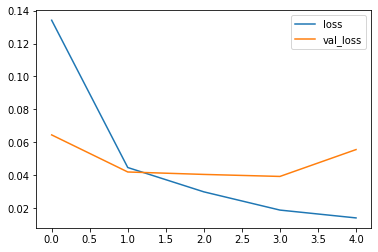

In [33]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

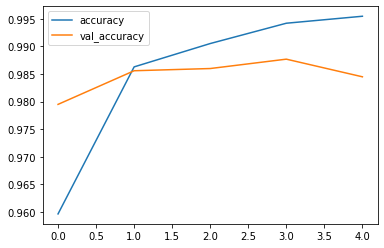

In [34]:
metrics[['accuracy','val_accuracy']].plot()

In [36]:
model.metrics_names

['loss', 'accuracy']

In [37]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.05553339794278145, 0.984499990940094]

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
predict_x=model.predict(x_test) 
predictions=np.argmax(predict_x,axis=1)

In [42]:
y_cat_test.shape

(10000, 10)

In [43]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [44]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.98      0.98      1032
           3       1.00      0.94      0.97      1010
           4       0.99      0.99      0.99       982
           5       0.95      0.99      0.97       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [45]:
confusion_matrix(y_test, predictions)

array([[ 976,    0,    0,    0,    0,    0,    2,    0,    1,    1],
       [   1, 1130,    1,    0,    0,    0,    2,    0,    1,    0],
       [   2,    1, 1013,    0,    2,    0,    1,   10,    3,    0],
       [   0,    0,    6,  953,    0,   42,    0,    2,    7,    0],
       [   0,    0,    0,    0,  973,    0,    3,    0,    0,    6],
       [   2,    0,    0,    2,    0,  882,    3,    0,    3,    0],
       [   5,    2,    0,    0,    2,    2,  947,    0,    0,    0],
       [   0,    2,    5,    0,    0,    0,    0, 1018,    1,    2],
       [   4,    0,    1,    0,    0,    2,    1,    1,  963,    2],
       [   0,    1,    0,    0,    8,    5,    0,    3,    2,  990]],
      dtype=int64)

In [46]:
import seaborn as sns

In [48]:
#sns.heatmap(confusion_matrix(y_test, predictions))

In [49]:
my_number = x_test[0]

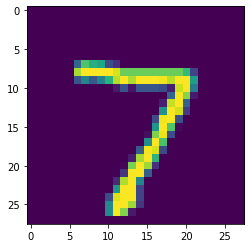

In [50]:
plt.imshow(my_number.reshape(28,28))

In [55]:
def predict_classes(model, x_test):
    predict_x=model.predict(x_test) 
    predictions=np.argmax(predict_x,axis=1)
    return predictions

In [57]:
#num_images, width, height, color_channels
predict_classes(model, my_number.reshape(1,28,28,1))

array([7], dtype=int64)